In [1]:
import pandas as pd

[[5.45681191e-03 1.11677192e-03 5.84315514e-04 ... 7.85638447e-03
  9.53915599e-03 6.33140009e-03]
 [5.78600391e-03 7.07310812e-04 1.84793475e-03 ... 8.62918563e-03
  2.07224365e-03 1.38092715e-02]
 [1.03388991e-02 1.48912212e-03 3.39042311e-05 ... 4.09400462e-03
  4.88865409e-03 6.58641747e-03]
 ...
 [1.93321540e-03 6.96717034e-04 1.12861263e-03 ... 7.20042236e-03
  1.21454359e-02 6.39732614e-03]
 [2.18247943e-03 1.35858622e-01 8.09089588e-04 ... 5.95150844e-03
  6.56463542e-03 5.86875977e-03]
 [4.02544430e-03 1.34760779e-03 1.73706009e-03 ... 2.61757207e-03
  1.81341152e-03 6.36278577e-03]]


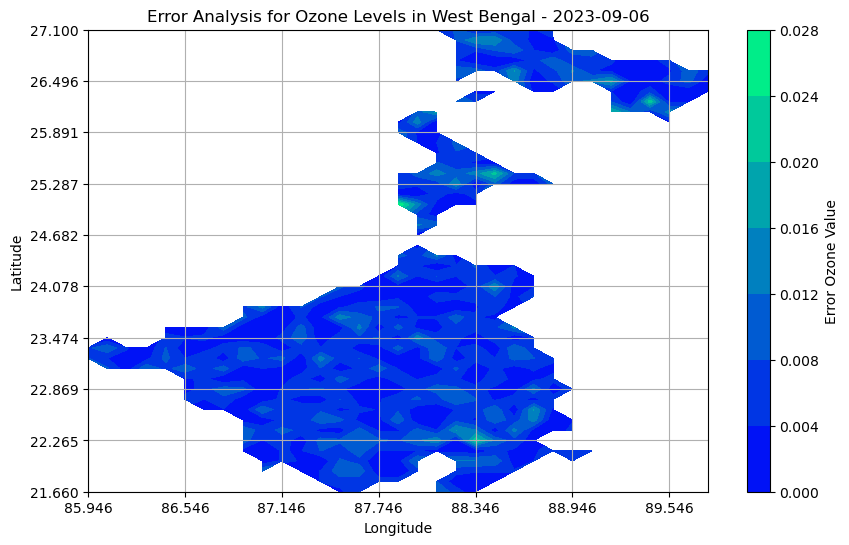

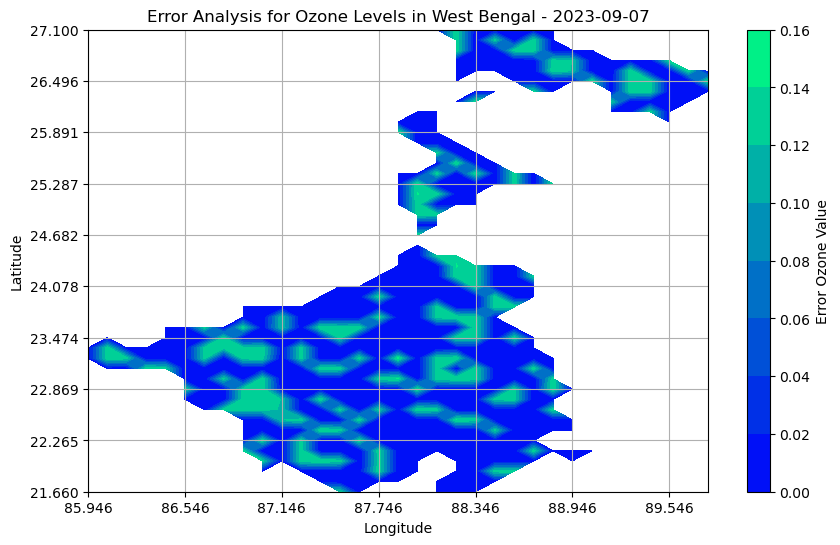

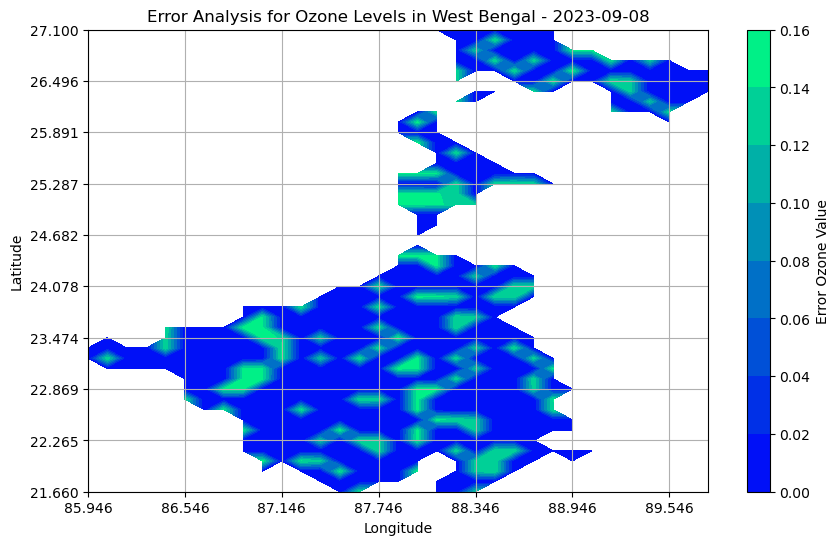

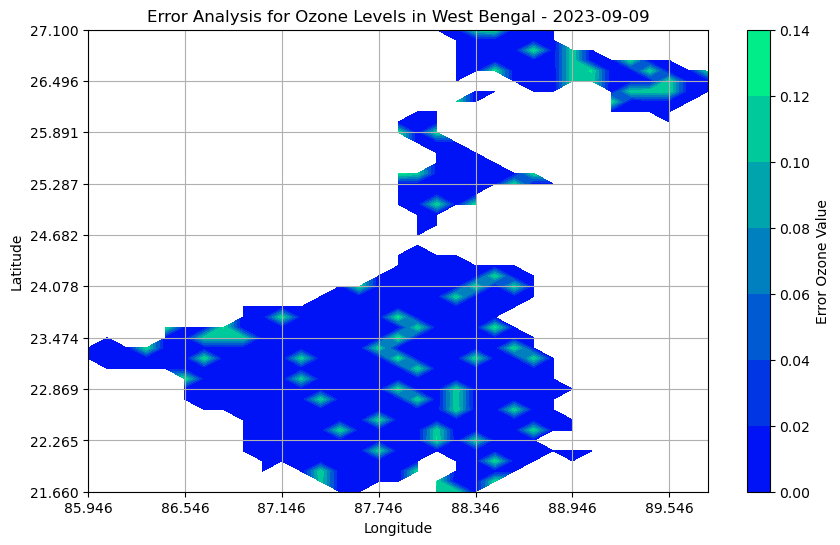

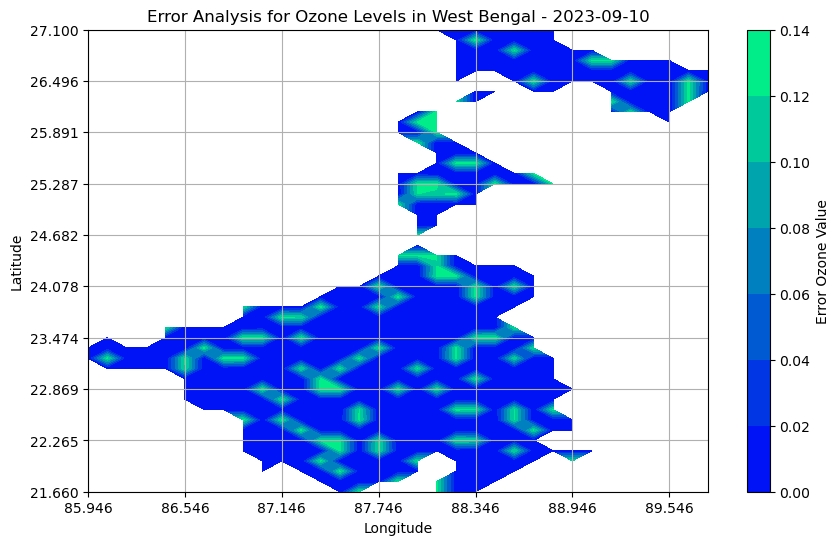

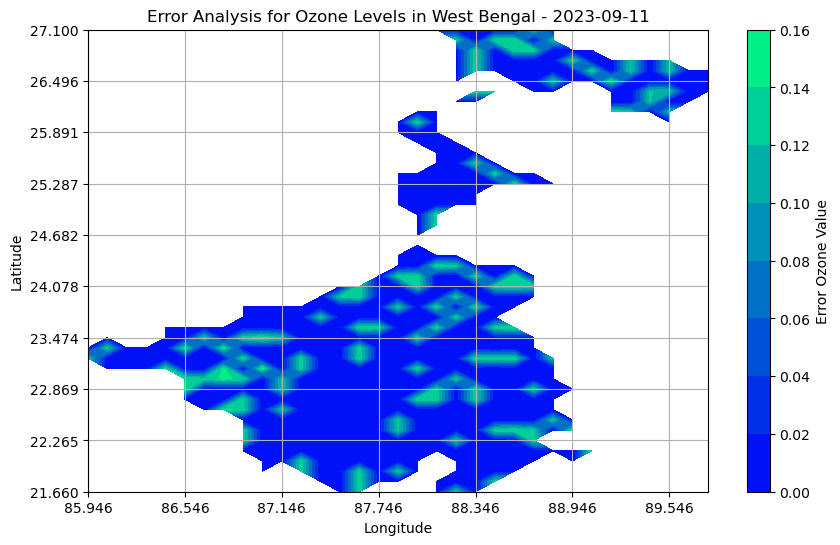

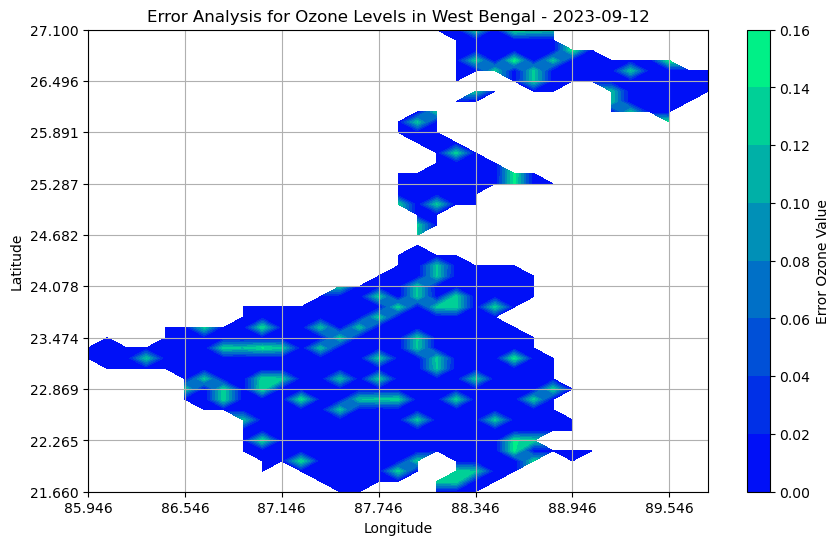

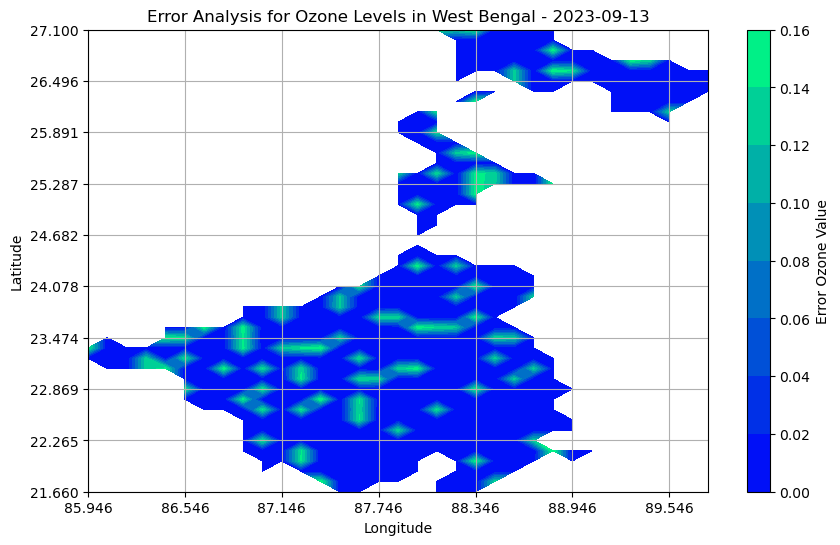

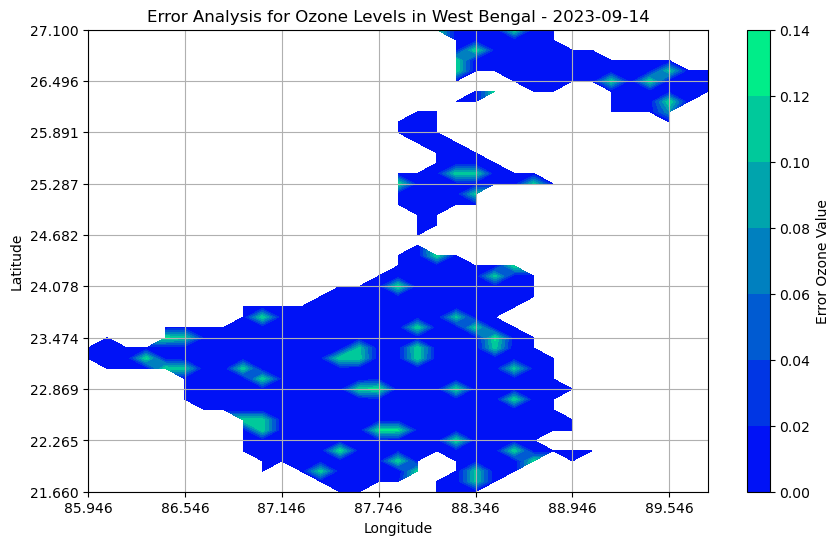

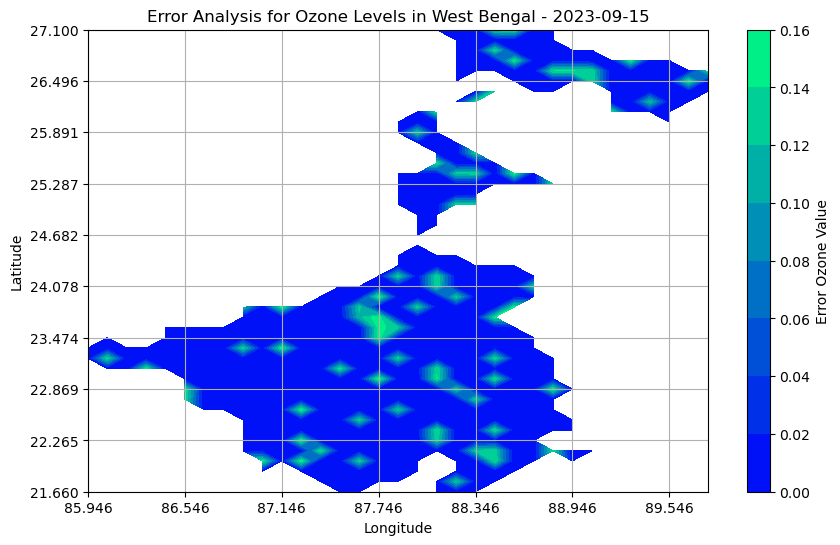

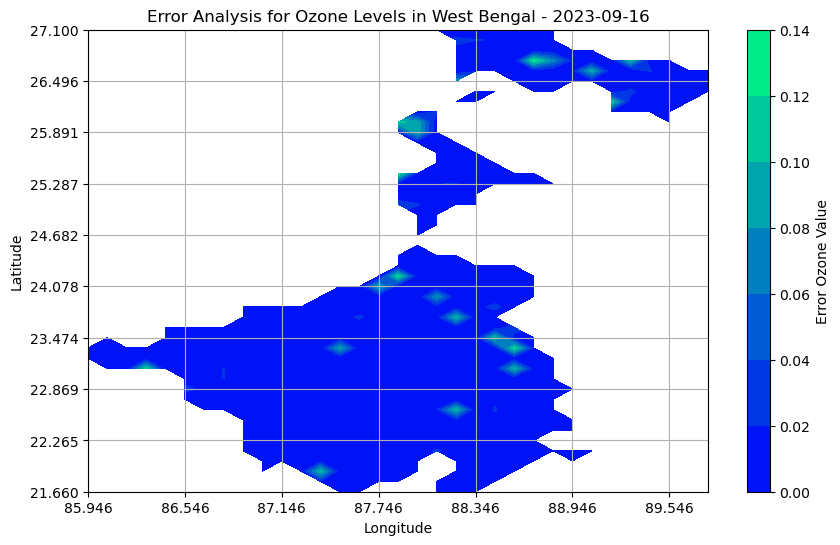

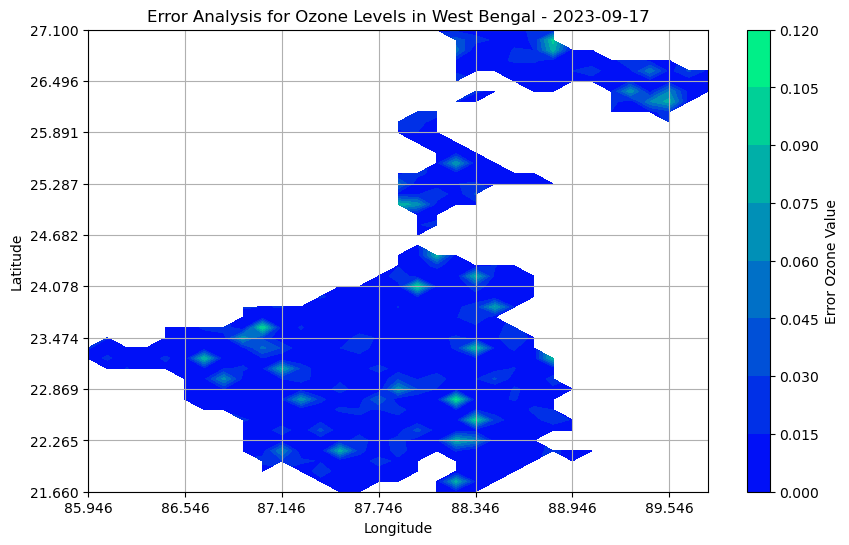

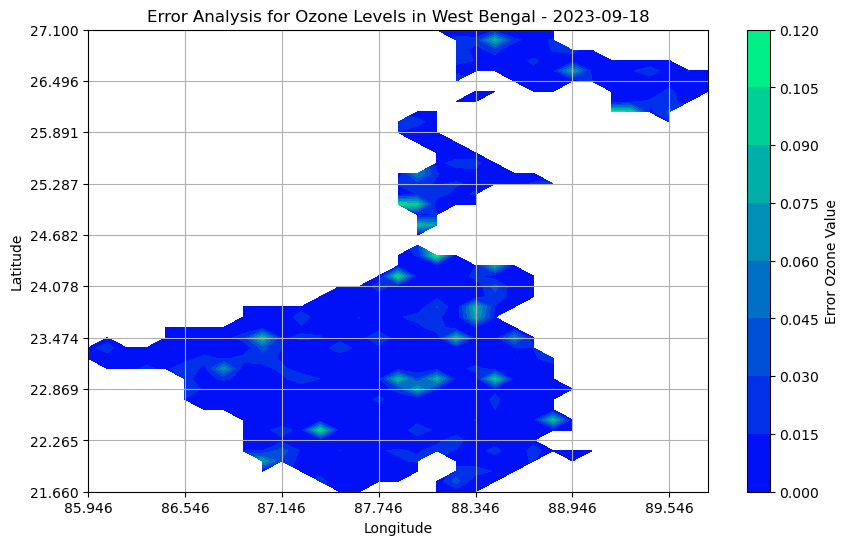

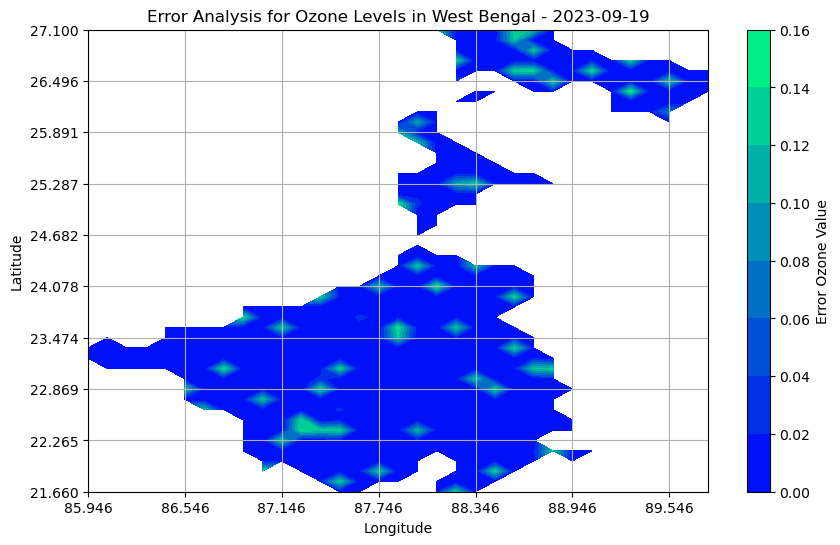

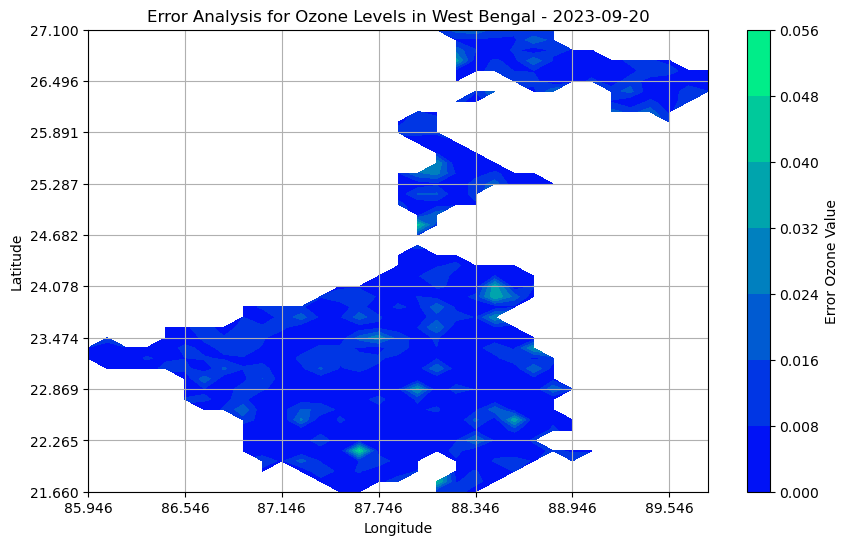

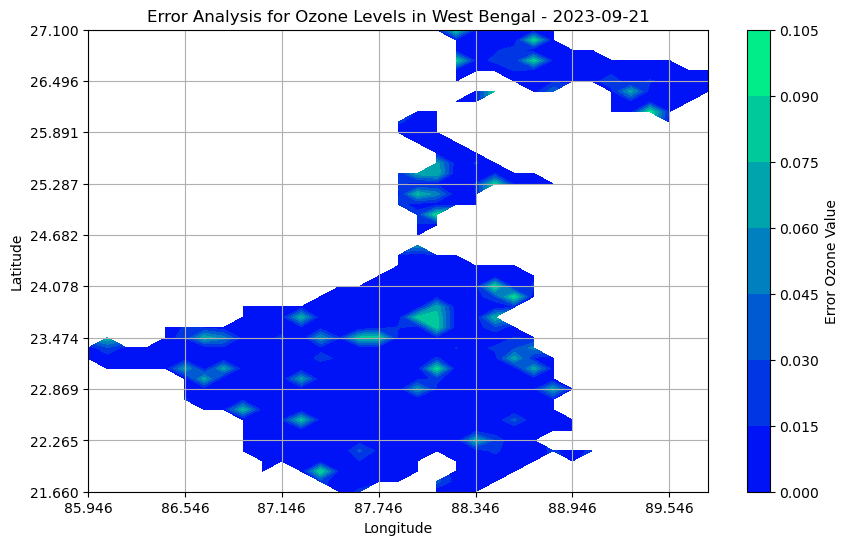

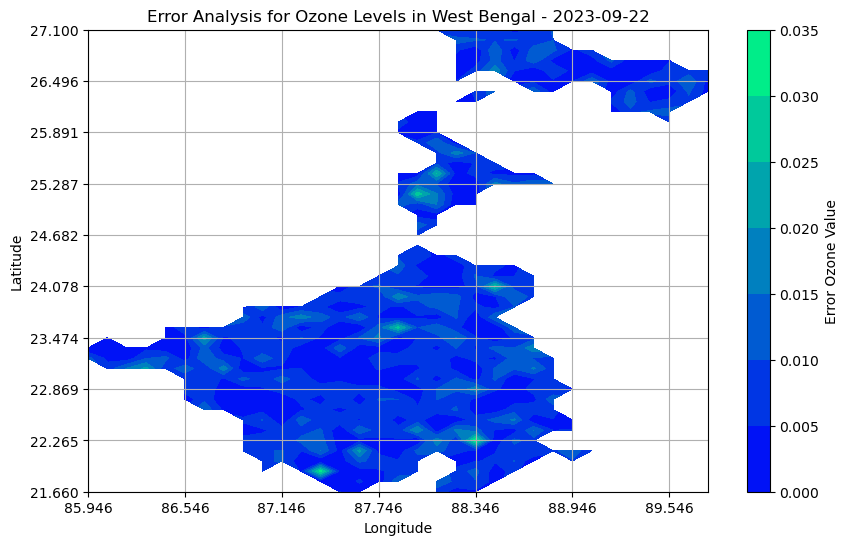

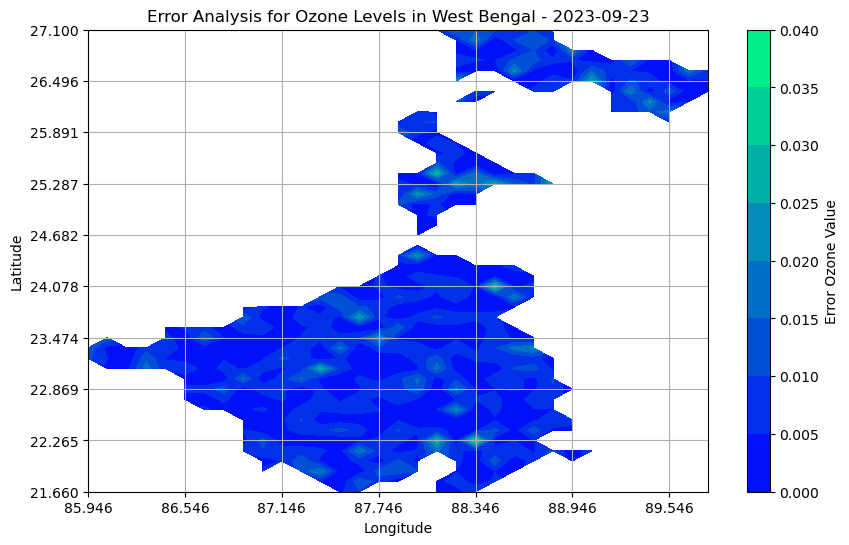

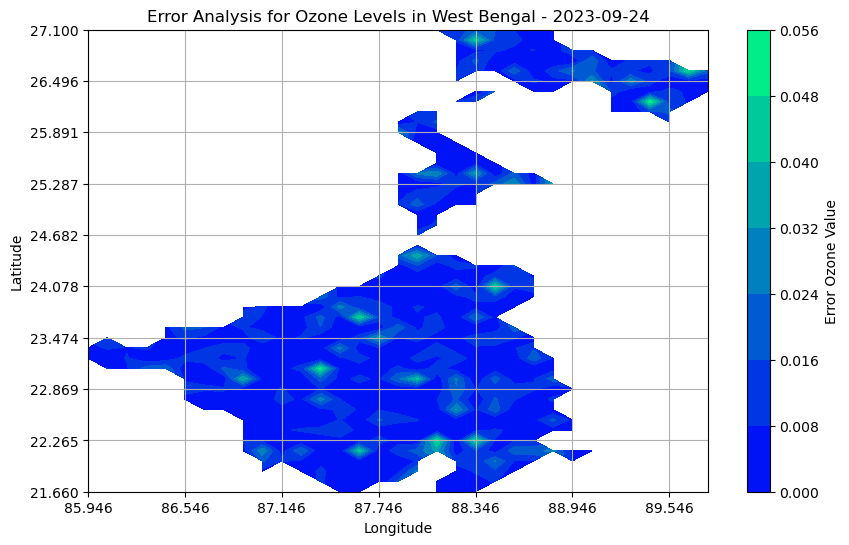

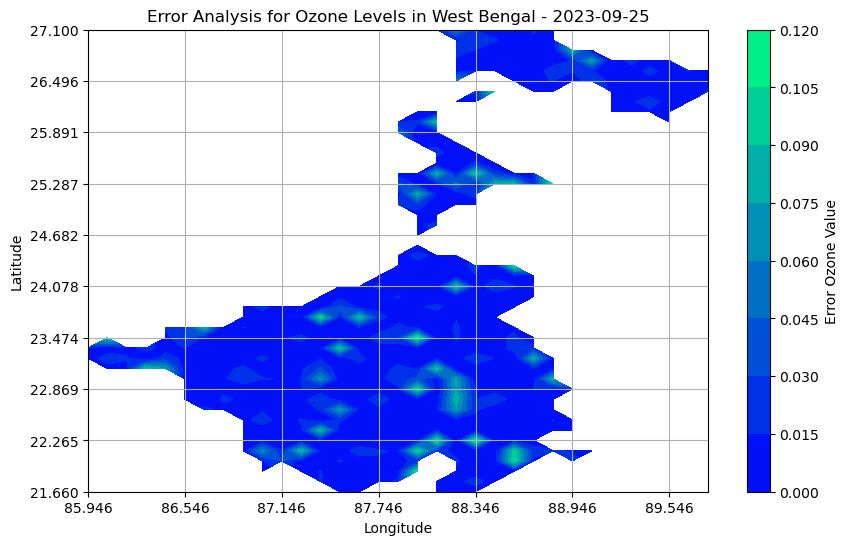

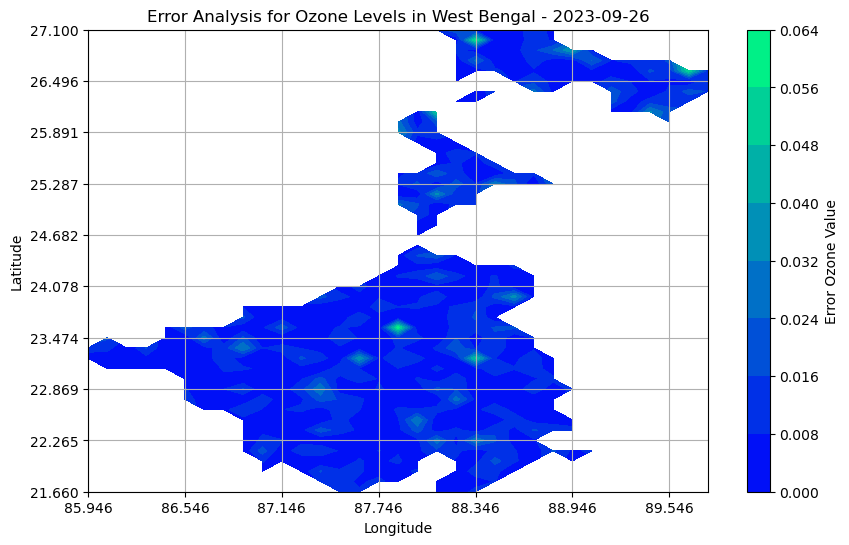

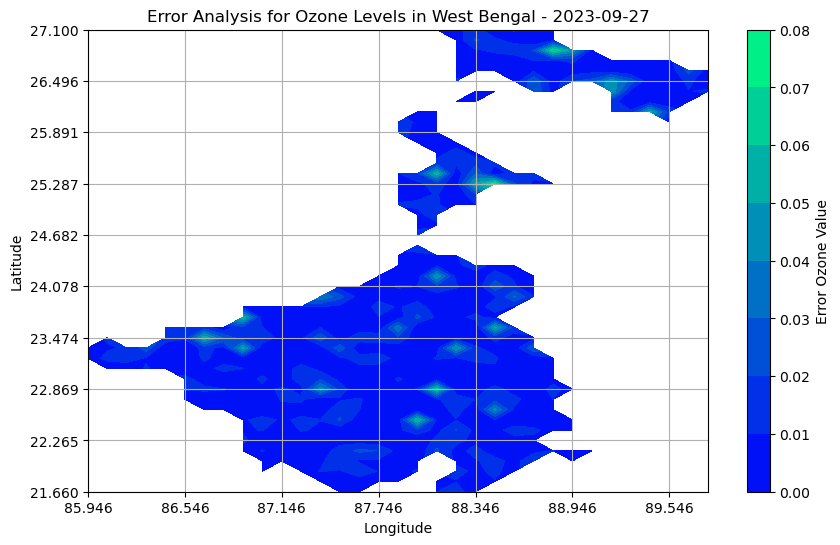

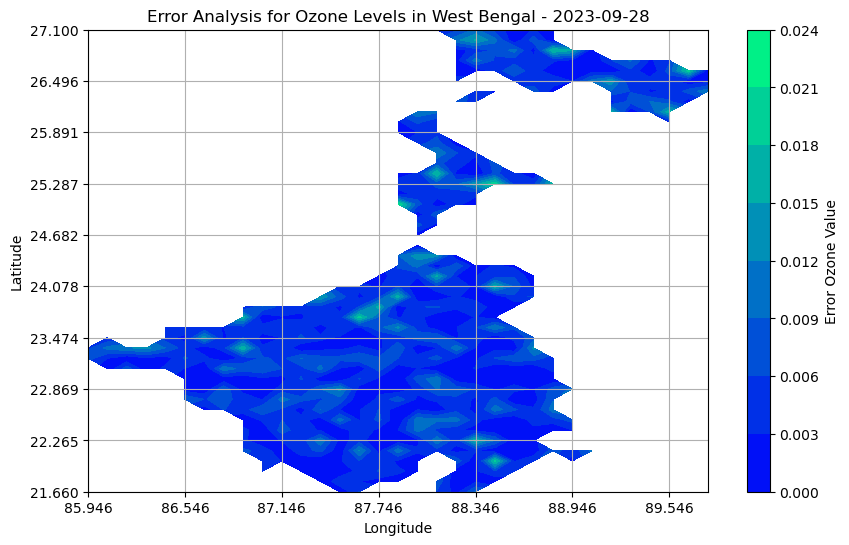

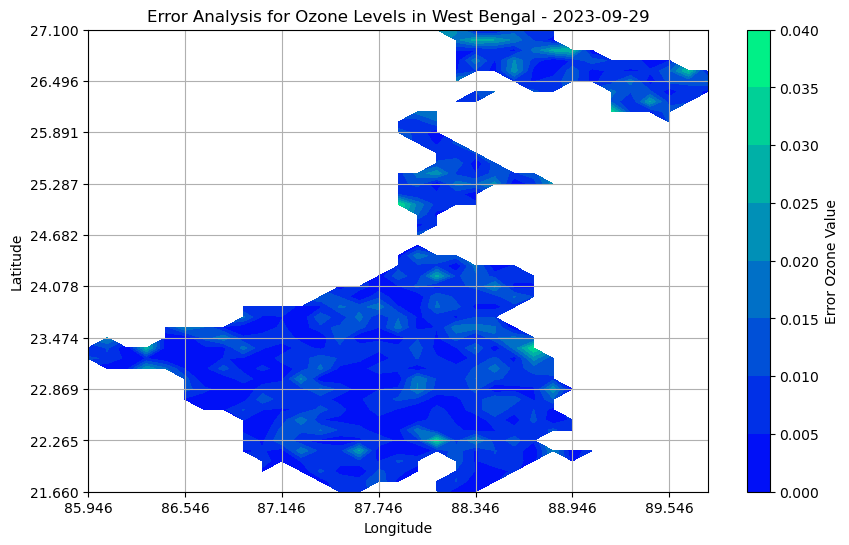

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Load kriging data for O3 in West Bengal
krig_wb_o3 = pd.read_csv("/home/sysadm/Downloads/wb/WB_2023_sep_O3_final.csv")
krig_wb_o3
kriging_remove_wb = krig_wb_o3.drop(columns=["latitude", "longitude", "2023-09-01", "2023-09-02", "2023-09-03", "2023-09-04", "2023-09-05"])

# Load LSTM predicted data for O3 in West Bengal
lstm_wb_o3 = pd.read_csv("/home/sysadm/Downloads/wb/Wb_o3/relu_predicted_6_30_o3.csv")
lstm_wb_o3.index = lstm_wb_o3["date"]
lstm_wb_o3 = lstm_wb_o3.drop(columns=['date'])

# Transpose LSTM predictions for O3 in West Bengal
relu_predicted_wb = lstm_wb_o3.transpose()
df_wb = relu_predicted_wb
kriging_remove_wb.index = relu_predicted_wb.index
df1_wb = kriging_remove_wb.to_numpy()
df2_wb = relu_predicted_wb.to_numpy()
result_df_numpy_wb = df1_wb - df2_wb

# Calculate the absolute value of each element
abs_array_wb = np.abs(result_df_numpy_wb)

# Print or use the result array as needed
print(abs_array_wb)

abs_array_df_wb = pd.DataFrame(abs_array_wb, columns=relu_predicted_wb.columns)
abs_array_df_wb["longitude"] = krig_wb_o3["longitude"]
abs_array_df_wb["latitude"] = krig_wb_o3["latitude"]
result_df_wb = abs_array_df_wb

import geopandas as gpd
import matplotlib.pyplot as plt

df2_wb = result_df_wb

# Assuming your DataFrame is named 'your_dataframe'
# Replace 'your_dataframe' with your actual DataFrame name
gdf_wb = gpd.GeoDataFrame(df2_wb, geometry=gpd.points_from_xy(df2_wb['longitude'], df2_wb['latitude']))

# Replace 'your_shapefile.shp' with your actual file path for West Bengal
shapefile_path_wb = './West_Bengal_shape_file/West_Bengal.shp'
basemap_wb = gpd.read_file(shapefile_path_wb)

# Check if points are within the shapefile boundary
points_within_shapefile_wb = gdf_wb[gdf_wb.geometry.within(basemap_wb.unary_union)]
gdf_within_shapefile_wb = points_within_shapefile_wb.reset_index(drop=True)  # Reset the index to avoid potential issues

# Now you can use gdf_within_shapefile_wb for further analysis or visualization

result_df_wb = gdf_within_shapefile_wb

# Iterate through each date column in the DataFrame
for column in result_df_wb.columns[0:-3]:  # Exclude latitude and longitude columns
    # Check if the entire column has NaN values
    if not result_df_wb[column].isnull().all():
        # Extract only the date part from the datetime string
        date_only_wb = pd.to_datetime(column).date()

        # Pivot the DataFrame for the specific date
        heatmap_data_wb = result_df_wb.pivot(index='latitude', columns='longitude', values=column)

        # Create a contour plot if there are no NaN values for the specific date
        if not heatmap_data_wb.isnull().values.all():
            plt.figure(figsize=(10, 6))
            contour_wb = plt.contourf(heatmap_data_wb.columns, heatmap_data_wb.index, heatmap_data_wb.values, cmap='winter')
            plt.colorbar(contour_wb, label='Error Ozone Value')
            plt.xticks(heatmap_data_wb.columns[::5])
            plt.yticks(heatmap_data_wb.index[::5])
            plt.xlabel('Longitude')
            plt.ylabel('Latitude')
            plt.title(f'Error Analysis for Ozone Levels in West Bengal - {date_only_wb}')
            plt.grid()
            #plt.savefig(f'/home/sysadm/Downloads/wb/Wb_o3/error_plot/Error Analysis for Ozone_plot_heat_{date_only_wb}_wb.png')
            plt.show()


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Load kriging data for O3 in West Bengal
krig_wb_o3 = pd.read_csv("/home/sysadm/Downloads/wb/WB_2023_sep_O3_final.csv")
krig_wb_o3
kriging_remove_wb = krig_wb_o3.drop(columns=["latitude", "longitude", "2023-09-01", "2023-09-02", "2023-09-03", "2023-09-04", "2023-09-05"])

# Load LSTM predicted data for O3 in West Bengal
lstm_wb_o3 = pd.read_csv("/home/sysadm/Downloads/wb/Wb_o3/relu_predicted_6_30_o3.csv")
lstm_wb_o3.index = lstm_wb_o3["date"]
lstm_wb_o3 = lstm_wb_o3.drop(columns=['date'])

# Transpose LSTM predictions for O3 in West Bengal
relu_predicted_wb = lstm_wb_o3.transpose()
df_wb = relu_predicted_wb
kriging_remove_wb.index = relu_predicted_wb.index
df1_wb = kriging_remove_wb.to_numpy()
df2_wb = relu_predicted_wb.to_numpy()
result_df_numpy_wb = df1_wb - df2_wb

# Calculate the absolute value of each element
abs_array_wb = np.abs(result_df_numpy_wb)

abs_array_df_wb = pd.DataFrame(abs_array_wb, columns=relu_predicted_wb.columns)
abs_array_df_wb["longitude"] = krig_wb_o3["longitude"]
abs_array_df_wb["latitude"] = krig_wb_o3["latitude"]
result_df_wb = abs_array_df_wb
# Assuming your DataFrame is named 'df'
columns_to_include = abs_array_df_wb.columns.difference(['latitude', 'longitude'])

abs_array_df_wb['mean_value'] = abs_array_df_wb[columns_to_include].mean(axis=1)

result_df = abs_array_df_wb[['latitude', 'longitude', 'mean_value']]

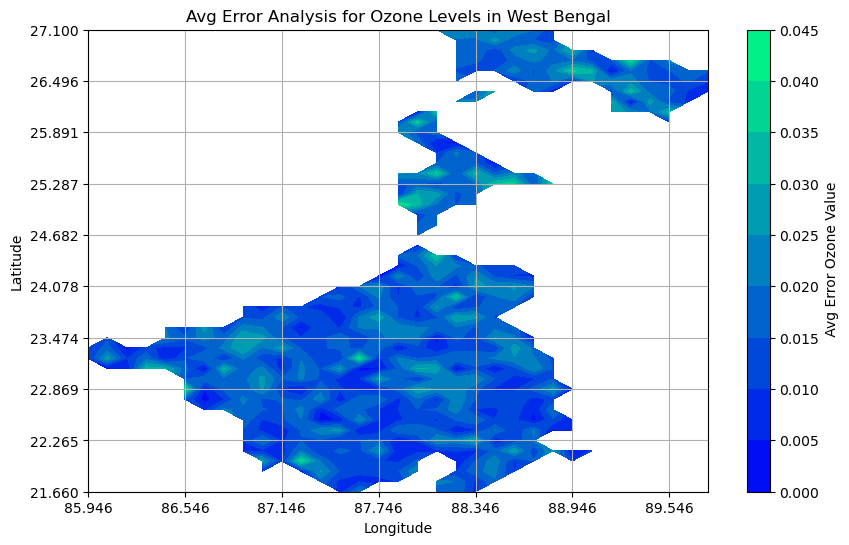

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

df2_wb = result_df

# Assuming your DataFrame is named 'your_dataframe'
# Replace 'your_dataframe' with your actual DataFrame name
gdf_wb = gpd.GeoDataFrame(df2_wb, geometry=gpd.points_from_xy(df2_wb['longitude'], df2_wb['latitude']))

# Replace 'your_shapefile.shp' with your actual file path for West Bengal
shapefile_path_wb = './West_Bengal_shape_file/West_Bengal.shp'
basemap_wb = gpd.read_file(shapefile_path_wb)

# Check if points are within the shapefile boundary
points_within_shapefile_wb = gdf_wb[gdf_wb.geometry.within(basemap_wb.unary_union)]
gdf_within_shapefile_wb = points_within_shapefile_wb.reset_index(drop=True)  # Reset the index to avoid potential issues

# Now you can use gdf_within_shapefile_wb for further analysis or visualization

result_df_wb = gdf_within_shapefile_wb

# Iterate through each date column in the DataFrame
for column in result_df_wb.columns[2:3]:  # Exclude latitude and longitude columns
    # Check if the entire column has NaN values
    if not result_df_wb[column].isnull().all():
        # Extract only the date part from the datetime string
        #date_only_wb = pd.to_datetime(column).date()

        # Pivot the DataFrame for the specific date
        heatmap_data_wb = result_df_wb.pivot(index='latitude', columns='longitude', values=column)

        # Create a contour plot if there are no NaN values for the specific date
        if not heatmap_data_wb.isnull().values.all():
            plt.figure(figsize=(10, 6))
            contour_wb = plt.contourf(heatmap_data_wb.columns, heatmap_data_wb.index, heatmap_data_wb.values, cmap='winter')
            plt.colorbar(contour_wb, label=' Avg Error Ozone Value')
            plt.xticks(heatmap_data_wb.columns[::5])
            plt.yticks(heatmap_data_wb.index[::5])
            plt.xlabel('Longitude')
            plt.ylabel('Latitude')
            plt.title(f'Avg Error Analysis for Ozone Levels in West Bengal')
            plt.grid()
            plt.savefig(f'/home/sysadm/Downloads/Avg_Error Analysis for Ozone_plot_heat_wb.png')
            plt.show()
